In [26]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sacremoses import MosesTokenizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jackieoh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [78]:
data = pd.read_csv('news_article_data.csv')

In [79]:
data.dropna()
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'title', 'publication', 'author',
       'date', 'year', 'month', 'url', 'content', 'tokenized', 'neg', 'neu',
       'pos', 'compound'],
      dtype='object')

In [80]:
def format_date(text):
    if '/' in text:
        year_month_day = text.split('/')
        output = year_month_day[0]
        if int(year_month_day[1]) < 9:
            output = output + '-0' + year_month_day[1]
        else:
            output = output + '-' + year_month_day[1]
        if int(year_month_day[2]) < 9:
            output = output + '-0' + year_month_day[2]
        else:
            output = output + '-' + year_month_day[2]
        return output
    else:
        return text

data['formatted_date'] = data['date'].apply(format_date)

In [81]:
honeywell = data.loc[data['content'].str.contains('Honeywell')]
mmm = data.loc[data['content'].str.contains('MMM|3M|Minnesota Mining and Manufacturing')]
bayer = data.loc[data['content'].str.contains('Bayer|BAYZF')]
synchrony = data.loc[data['content'].str.contains('Synchrony|SYF')]

general_stock_market = data.loc[data['content'].str.contains('stock market')]
bayer_industry_specific = data.loc[data['content'].str.contains('pharma|pharmaceuticals|crop science|gmo|monsanto')]
synchrony_industry_specific = data.loc[data['content'].str.contains('credit card')]

In [52]:
stock_prices_HON = pd.read_csv('Data Given/HON.csv')
stock_prices_MMM = pd.read_csv('Data Given/MMM.csv')
stock_prices_BAYZF = pd.read_csv('Data Given/BAYZF.csv')
stock_prices_SYF = pd.read_csv('Data Given/SYF.csv')

In [53]:
stock_prices_HON['datetime'] = pd.to_datetime(stock_prices_HON['Date'])
stock_prices_MMM['datetime'] = pd.to_datetime(stock_prices_MMM['Date'])
stock_prices_BAYZF['datetime'] = pd.to_datetime(stock_prices_BAYZF['Date'])
stock_prices_SYF['datetime'] = pd.to_datetime(stock_prices_SYF['Date'])

In [70]:
stock_price_line_HON = go.Scatter(x=stock_prices_HON['datetime'],y=stock_prices_HON['Close'])
sentiment_bar_HON = go.Bar(x=general_stock_market['formatted_date'],y=general_stock_market['pos']*800)

sentiment_vs_stock_HON = [stock_price_line_HON, sentiment_bar_HON]

iplot(sentiment_vs_stock_HON, filename='bar-line')

honeywell[['date', 'pos']].iplot(kind='hist', x='date', y='pos')

In [57]:
stock_price_line_MMM = go.Scatter(x=stock_prices_MMM['datetime'],y=stock_prices_MMM['Close'])
sentiment_bar_mmm = go.Bar(x=mmm['formatted_date'],y=mmm['pos']*1000)

sentiment_vs_stock_MMM = [stock_price_line_MMM, sentiment_bar_mmm]

iplot(sentiment_vs_stock_MMM, filename='bar-line')

mmm[['date', 'pos']].iplot(kind='hist', x='date', y='pos')

In [61]:
stock_price_line_BAYZF = go.Scatter(x=stock_prices_BAYZF['datetime'],y=stock_prices_BAYZF['Close'])
sentiment_bar_bayer = go.Bar(x=bayer['formatted_date'],y=bayer['pos']*1000)
industry_sentiment_bar_bayer = go.Bar(x=bayer_industry_specific['formatted_date'],y=bayer_industry_specific['pos']*1000)

sentiment_vs_stock_bayer = [stock_price_line_BAYZF, sentiment_bar_bayer]
industry_sentiment_vs_stock_bayer = [stock_price_line_BAYZF, industry_sentiment_bar_bayer]

iplot(sentiment_vs_stock_bayer, filename='bar-line')
iplot(industry_sentiment_vs_stock_bayer, filename='bar-line')

# mmm[['date', 'pos']].iplot(kind='hist', x='date', y='pos')

In [67]:
stock_price_line_SYF = go.Scatter(x=stock_prices_SYF['datetime'],y=stock_prices_SYF['Close'])
sentiment_bar_syf = go.Bar(x=synchrony['formatted_date'],y=synchrony['pos']*500)
industry_sentiment_bar_syf = go.Bar(x=synchrony_industry_specific['formatted_date'],y=synchrony_industry_specific['pos']*500)

sentiment_vs_stock_syf = [stock_price_line_SYF, sentiment_bar_syf]
industry_sentiment_vs_stock_bayer = [stock_price_line_SYF, industry_sentiment_bar_syf]

iplot(sentiment_vs_stock_syf, filename='bar-line')
iplot(industry_sentiment_vs_stock_bayer, filename='bar-line')

# mmm[['date', 'pos']].iplot(kind='hist', x='date', y='pos')

In [107]:
general_stock_market_scatter = go.Scatter(x=general_stock_market['date'], y=general_stock_market['neg'], mode='markers')

iplot([general_stock_market_scatter])

In [108]:
def get_average_sentiment_per_day(df):
    row_dict_list = []
    
    all_days = set(df['formatted_date'])
    
    for date in all_days:
        row_dict={}
        row_dict['date'] = date
        articles_for_day = df.loc[df['date'] == date]
        row_dict['pos'] = articles_for_day['pos'].mean()
        row_dict['neg'] = articles_for_day['neg'].mean()
        row_dict['neu'] = articles_for_day['neu'].mean()
        row_dict['compound'] = articles_for_day['compound'].mean()
        row_dict_list.append(row_dict)
        
    return pd.DataFrame(row_dict_list)

In [109]:
general_stock_market_sentiment_by_day = get_average_sentiment_per_day(general_stock_market)

In [110]:
general_stock_market_sentiment_by_day.head

<bound method NDFrame.head of      compound        date       neg       neu       pos
0    0.995100  2017-03-19  0.028000  0.751000  0.220000
1    0.998200  2016-04-27  0.057000  0.784000  0.160000
2    0.985500  2016-09-18  0.038000  0.876000  0.086000
3    0.975200  2016-01-02  0.028000  0.870000  0.102000
4   -0.947700  2016-06-19  0.059000  0.894000  0.047000
5    0.964300  2016-08-03  0.074000  0.827000  0.100000
6   -0.834700  2016-06-17  0.140000  0.768000  0.092000
7    0.884875  2017-02-01  0.038500  0.861250  0.100000
8   -0.992200  2016-04-07  0.140000  0.776000  0.083000
9    0.000000  2017-01-15  0.085500  0.818500  0.096000
10   0.919150  2016-03-29  0.080500  0.826500  0.092500
11        NaN  2016-10-03       NaN       NaN       NaN
12   0.996700  2016-09-26  0.053000  0.835000  0.112000
13   0.392300  2016-09-07  0.048667  0.887333  0.064667
14   0.053125  2016-11-20  0.051000  0.850000  0.099500
15   0.476700  2016-08-19  0.074000  0.845000  0.081000
16   0.992500  201

In [127]:
general_stock_market_sentiment_by_day.sort_values('date')

general_stock_market_sentiment_by_day_bar = go.Scatter(x=general_stock_market_sentiment_by_day['date'], y=general_stock_market_sentiment_by_day['neg']*2000, mode='markers')
general_stock_market_sentiment_by_day_bar_pos = go.Scatter(x=general_stock_market_sentiment_by_day['date'], y=general_stock_market_sentiment_by_day['pos']*2000, mode='markers')

iplot([general_stock_market_sentiment_by_day_bar, general_stock_market_sentiment_by_day_bar_pos])

In [100]:
sentiment_vs_stock_MMM = [stock_price_line_MMM, general_stock_market_sentiment_by_day_bar]

iplot(sentiment_vs_stock_MMM, filename='bar-line')

In [102]:
general_stock_market_sentiment_by_day['datetime'] = pd.to_datetime(general_stock_market_sentiment_by_day['date'])
merged = pd.merge(general_stock_market_sentiment_by_day, stock_prices_SYF, how='inner', on='datetime')

In [103]:
merged.head

<bound method NDFrame.head of      compound        date       neg       neu       pos   datetime  \
0    0.998200  2016-04-27  0.057000  0.784000  0.160000 2016-04-27   
1    0.964300  2016-08-03  0.074000  0.827000  0.100000 2016-08-03   
2   -0.834700  2016-06-17  0.140000  0.768000  0.092000 2016-06-17   
3    0.884875  2017-02-01  0.038500  0.861250  0.100000 2017-02-01   
4   -0.992200  2016-04-07  0.140000  0.776000  0.083000 2016-04-07   
5    0.919150  2016-03-29  0.080500  0.826500  0.092500 2016-03-29   
6         NaN  2016-10-03       NaN       NaN       NaN 2016-10-03   
7    0.996700  2016-09-26  0.053000  0.835000  0.112000 2016-09-26   
8         NaN   2016-9-26       NaN       NaN       NaN 2016-09-26   
9    0.392300  2016-09-07  0.048667  0.887333  0.064667 2016-09-07   
10   0.476700  2016-08-19  0.074000  0.845000  0.081000 2016-08-19   
11   0.992500  2017-01-12  0.052000  0.841000  0.107000 2017-01-12   
12   0.920100  2016-04-05  0.077000  0.821000  0.102000 2016

In [120]:
merged.sort_values('pos')

merged.iplot(kind='scatter',x='pos', y='Close',mode='markers')

In [123]:
merged.columns

Index(['compound', 'date', 'neg', 'neu', 'pos', 'datetime', 'Date', 'Open',
       'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype='object')

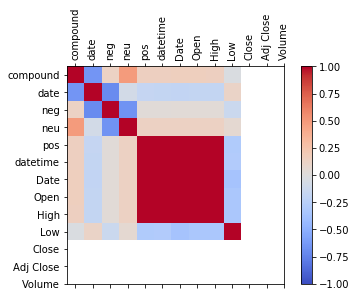

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

corr = merged.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(merged.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(merged.columns)
ax.set_yticklabels(merged.columns)
plt.show()

In [129]:
honeywell_avg_sentiment_by_day = get_average_sentiment_per_day(honeywell)
mmm_avg_sentiment_by_day = get_average_sentiment_per_day(mmm)
bayer_avg_sentiment_by_day = get_average_sentiment_per_day(bayer)
synchrony_avg_sentiment_by_day = get_average_sentiment_per_day(synchrony)

general_stock_market_sentiment_by_day.to_csv('general_stock_market_sentiment_by_day.csv')
mmm_avg_sentiment_by_day.to_csv('mmm_avg_sentiment_by_day.csv')
bayer_avg_sentiment_by_day.to_csv('bayer_avg_sentiment_by_day.csv')
honeywell_avg_sentiment_by_day.to_csv('honeywell_avg_sentiment_by_day.csv')
synchrony_avg_sentiment_by_day.to_csv('synchrony_avg_sentiment_by_day.csv')